In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
df = pd.read_csv("/kaggle/input/techparva3-datathon/train.csv")
df_test = pd.read_csv("/kaggle/input/techparva3-datathon/test.csv")

In [3]:
test_ids = df_test['member_id']

In [4]:
# !pip install ydata-profiling
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Profiling Report")
# profile.to_file("eda_report.html")

## Check Information of the dataset

In [5]:
len(df),len(df_test)

(75001, 25001)

In [6]:
df.sample(5)

,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,...,installment,int_rate,loan_amount,total_acc,total_payment,issue_date_year,issue_date_month,issue_date_day,issue_date_weekday,issue_date_hour
71280,TX,INDIVIDUAL,4 years,Spherion,E,MORTGAGE,2021-10-11,2021-05-15,2021-01-14,Charged Off,...,153.401254,0.182078,3804.688786,NaN,NaN,2021,10,11,0,0
65292,NY,INDIVIDUAL,8 years,Mcdonalds,C,OWN,2021-09-11,2021-05-16,2021-01-14,Fully Paid,...,410.250907,0.178685,NaN,14.791267,NaN,2021,9,11,5,0
54235,CA,INDIVIDUAL,6 years,AWI,D,RENT,2021-11-11,2021-05-16,2021-09-11,Fully Paid,...,492.017648,0.188232,8957.572986,18.321849,9488.082037,2021,11,11,3,0
46833,WA,INDIVIDUAL,10+ years,Department of defense,B,RENT,2021-08-10,2021-05-16,2021-12-12,Fully Paid,...,170.650241,0.079546,8477.566377,22.947922,NaN,2021,8,10,1,0
42083,FL,INDIVIDUAL,10+ years,Kohler Company,D,MORTGAGE,2021-04-11,2021-11-13,2021-06-14,Fully Paid,...,401.339086,0.143626,NaN,23.673025,NaN,2021,4,11,6,0


In [7]:
target = df['grade']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75001 entries, 0 to 75000
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address_state          75001 non-null  object 
 1   application_type       75001 non-null  object 
 2   emp_length             75001 non-null  object 
 3   emp_title              75001 non-null  object 
 4   grade                  75001 non-null  object 
 5   home_ownership         75001 non-null  object 
 6   issue_date             75001 non-null  object 
 7   last_credit_pull_date  75001 non-null  object 
 8   last_payment_date      75001 non-null  object 
 9   loan_status            75001 non-null  object 
 10  next_payment_date      75001 non-null  object 
 11  member_id              75001 non-null  float64
 12  purpose                75001 non-null  object 
 13  term                   75001 non-null  object 
 14  verification_status    75001 non-null  object 
 15  an

In [9]:
df.duplicated().sum()

np.int64(0)

## Missing Values

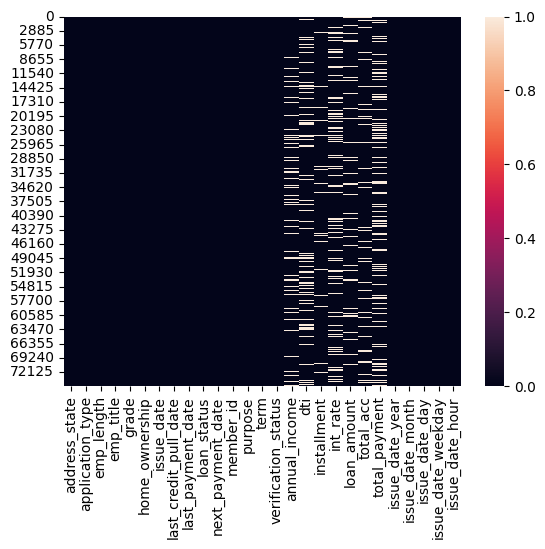

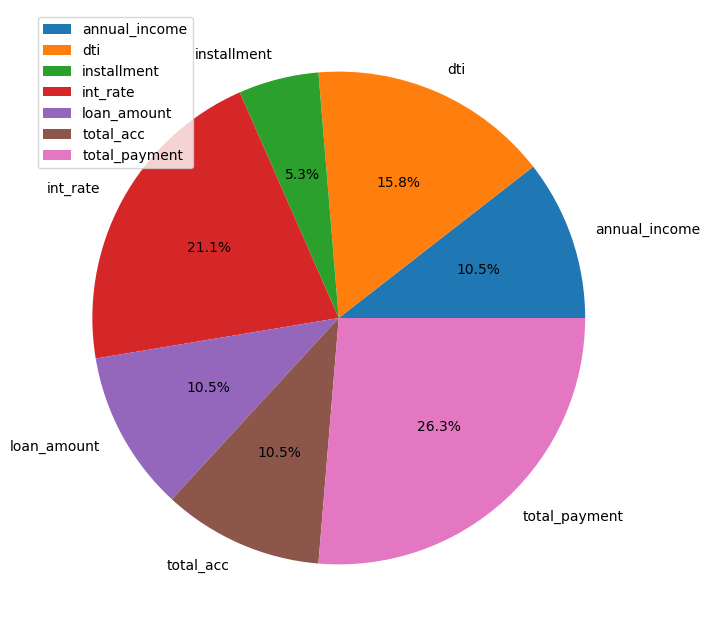

In [10]:
def missing_analysis(df):
    ''' Generating Heatmap and Piechart to visualize the missing data'''
    heatm = sns.heatmap(data=df.isna())
    missing_data = df.isna().sum()[(df.isna().sum()) > 0] * (100/sum(df.isna().sum()))
    labels = df.isna().sum()[(df.isna().sum()) > 0].index

    plt.figure(figsize=(12,8))
    plt.pie(missing_data,labels = labels, autopct='%1.1f%%')
    plt.legend()
    plt.show()
    
missing_analysis(df)

In [11]:
missing_data = df.isna().sum()[(df.isna().sum()) > 0] * (100/sum(df.isna().sum()))
missing_data

annual_income    10.526316
dti              15.789474
installment       5.263158
int_rate         21.052632
loan_amount      10.526316
total_acc        10.526316
total_payment    26.315789
dtype: float64

In [12]:
df.isna().sum()[(df.isna().sum()) > 0].index

Index(['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
       'total_acc', 'total_payment'],
      dtype='object')

## Correlations

### Dropping Columns

The columns we will be dropping are:
1. issue_date_year -> const value
2. issue_date_hour -> const value
3. issue_date -> Since year,hour,and all are already extracted.
4. application_type -> const value
5. member_id -> Not required

In [13]:
new_df = df.drop(columns=['issue_date_year','issue_date_hour','issue_date','application_type','member_id'])

In [14]:
new_df.columns

Index(['address_state', 'emp_length', 'emp_title', 'grade', 'home_ownership',
       'last_credit_pull_date', 'last_payment_date', 'loan_status',
       'next_payment_date', 'purpose', 'term', 'verification_status',
       'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
       'total_acc', 'total_payment', 'issue_date_month', 'issue_date_day',
       'issue_date_weekday'],
      dtype='object')

In [15]:
numeric_cols = [col for col in new_df.columns if new_df[col].dtype != 'object']
df_numeric = new_df[numeric_cols]
df_numeric.describe()

,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date_month,issue_date_day,issue_date_weekday
count,67501.000000,63751.000000,71251.000000,60001.000000,67501.000000,67501.000000,56251.000000,75001.000000,75001.000000,75001.000000
mean,75948.832640,0.136321,397.494234,0.152150,14007.703085,22.509181,15494.180602,7.154291,10.384262,3.181318
std,63434.809268,0.064982,243.407272,0.055995,8782.891714,12.312632,11643.633459,3.413656,0.856953,1.929661
min,-294461.966161,-0.152320,-470.742442,-0.050444,-22068.213300,-38.525663,-31937.824830,1.000000,1.000000,0.000000
25%,35288.245569,0.093132,229.230220,0.112169,7879.163712,14.276190,7516.531265,4.000000,10.000000,2.000000
50%,75400.804843,0.136576,383.682593,0.154825,13378.452336,22.484164,14241.661213,7.000000,11.000000,3.000000
75%,116750.076136,0.180279,553.312134,0.193558,19649.635508,30.649657,22418.619925,10.000000,11.000000,5.000000
max,419877.028635,0.463241,1551.686432,0.344403,55775.851091,78.813748,71119.927451,12.000000,25.000000,6.000000


In [16]:
new_df

,address_state,emp_length,emp_title,grade,home_ownership,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,purpose,...,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date_month,issue_date_day,issue_date_weekday
0,CA,4 years,"Windsor Solutions, Inc.",D,RENT,2021-07-15,2021-07-12,Current,2021-07-13,Debt consolidation,...,82438.124601,0.072151,62.006774,0.161206,9586.945180,1.953600,NaN,8,7,5
1,PA,3 years,Grant & Eisenhofer,C,MORTGAGE,2021-05-16,2021-03-13,Charged Off,2022-01-13,wedding,...,52347.892639,0.140367,373.547998,0.117188,2213.200815,22.458280,12901.399781,4,9,4
2,DC,6 years,VALLEY PLUMBING COMPANY,B,RENT,2021-05-16,2021-03-12,Fully Paid,2021-08-14,Debt consolidation,...,-38314.485684,0.125850,529.631006,0.089163,15608.890161,NaN,10082.118704,7,10,5
3,WI,7 years,Housing Investments Inc,G,MORTGAGE,2021-04-16,2021-07-14,Fully Paid,2021-05-15,Debt consolidation,...,254889.785659,0.148349,1057.386266,0.171302,16700.391717,2.814647,NaN,10,11,0
4,NY,10+ years,Massage Envy,C,MORTGAGE,2021-10-12,2021-01-14,Charged Off,2021-02-15,credit card,...,NaN,NaN,510.555677,0.091857,4109.600739,NaN,13485.994361,1,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74996,TX,4 years,Bath and Body Works,C,MORTGAGE,2021-02-13,2021-10-14,Fully Paid,2021-08-14,Debt consolidation,...,-139022.223332,0.237799,374.438907,0.153717,10409.513686,26.351786,16376.396218,11,9,1
74997,CO,5 years,B&W,A,RENT,2021-11-14,2021-03-11,Fully Paid,2021-09-12,medical,...,-36642.312324,0.089881,565.528528,0.047282,5688.622795,11.314196,11387.744804,12,11,5
74998,CT,5 years,Motiva Enterprises,F,RENT,2021-11-14,2021-11-10,Fully Paid,2021-06-16,Debt consolidation,...,NaN,0.103079,360.823876,0.211030,9966.287828,12.771098,26088.288340,10,11,0
74999,CA,6 years,Penmark Management LLC.,C,MORTGAGE,2021-06-14,2021-10-13,Charged Off,2021-02-13,medical,...,123554.693553,0.198773,368.929932,0.130109,NaN,19.545008,15235.473986,9,11,5


<Axes: xlabel='emp_length', ylabel='count'>

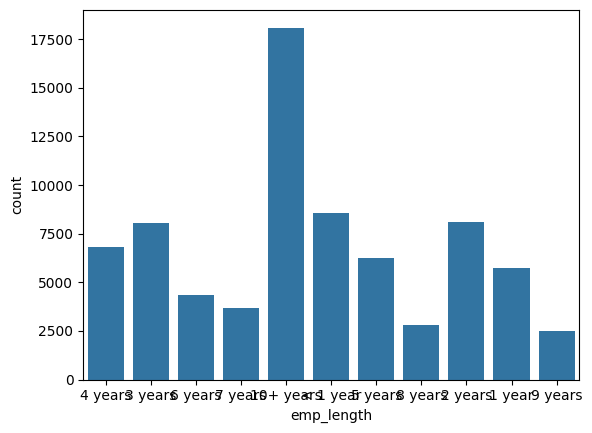

In [17]:
sns.countplot(x=new_df['emp_length'])

In [18]:
new_df['emp_title']

0               Windsor Solutions, Inc.
1                    Grant & Eisenhofer
2               VALLEY PLUMBING COMPANY
3               Housing Investments Inc
4                          Massage Envy
                      ...              
74996               Bath and Body Works
74997                               B&W
74998                Motiva Enterprises
74999           Penmark Management LLC.
75000    Gulf IntraCoastal Constructors
Name: emp_title, Length: 75001, dtype: object

In [19]:
obj_cols = [col for col in new_df.columns if new_df[col].dtype == 'object']

In [20]:
obj_cols

['address_state',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'last_credit_pull_date',
 'last_payment_date',
 'loan_status',
 'next_payment_date',
 'purpose',
 'term',
 'verification_status']

### Create features from last_credit_pull_date, last_payment_date, next_payment_date

In [21]:
new_df['last_credit_pull_date']

0        2021-07-15
1        2021-05-16
2        2021-05-16
3        2021-04-16
4        2021-10-12
            ...    
74996    2021-02-13
74997    2021-11-14
74998    2021-11-14
74999    2021-06-14
75000    2021-05-15
Name: last_credit_pull_date, Length: 75001, dtype: object

In [22]:
# function to handle date and time
def date_time(df):
    df["last_credit_pull_date"] = pd.to_datetime(df["last_credit_pull_date"])
    df["last_credit_pull_month"] = df["last_credit_pull_date"].dt.month
    df["last_credit_pull_day"] = df["last_credit_pull_date"].dt.day
    
    df["last_payment_date"] = pd.to_datetime(df["last_payment_date"])
    df["last_payment_month"] = df["last_payment_date"].dt.month
    df["last_payment_day"] = df["last_payment_date"].dt.day
    
    df["next_payment_date"] = pd.to_datetime(df["next_payment_date"])
    df["next_payment_year"] = df["next_payment_date"].dt.year
    df["next_payment_month"] = df["next_payment_date"].dt.month
    df["next_payment_day"] = df["next_payment_date"].dt.day
    df = df.drop(columns=['last_credit_pull_date','last_payment_date','next_payment_date'],inplace=True)

In [23]:
date_time(new_df)

In [24]:
# for test dataset
date_time(df_test)

In [25]:
new_df.columns

Index(['address_state', 'emp_length', 'emp_title', 'grade', 'home_ownership',
       'loan_status', 'purpose', 'term', 'verification_status',
       'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
       'total_acc', 'total_payment', 'issue_date_month', 'issue_date_day',
       'issue_date_weekday', 'last_credit_pull_month', 'last_credit_pull_day',
       'last_payment_month', 'last_payment_day', 'next_payment_year',
       'next_payment_month', 'next_payment_day'],
      dtype='object')

In [26]:
new_df.columns

Index(['address_state', 'emp_length', 'emp_title', 'grade', 'home_ownership',
       'loan_status', 'purpose', 'term', 'verification_status',
       'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
       'total_acc', 'total_payment', 'issue_date_month', 'issue_date_day',
       'issue_date_weekday', 'last_credit_pull_month', 'last_credit_pull_day',
       'last_payment_month', 'last_payment_day', 'next_payment_year',
       'next_payment_month', 'next_payment_day'],
      dtype='object')

In [27]:
new_df.columns

Index(['address_state', 'emp_length', 'emp_title', 'grade', 'home_ownership',
       'loan_status', 'purpose', 'term', 'verification_status',
       'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
       'total_acc', 'total_payment', 'issue_date_month', 'issue_date_day',
       'issue_date_weekday', 'last_credit_pull_month', 'last_credit_pull_day',
       'last_payment_month', 'last_payment_day', 'next_payment_year',
       'next_payment_month', 'next_payment_day'],
      dtype='object')

### Univariate Analysis on Cat columns

In [28]:
cat_cols = ['home_ownership','emp_length','loan_status','purpose','term',
            'verification_status','issue_date_month','issue_date_weekday',
            'issue_date_day','last_credit_pull_month', 'last_credit_pull_day',
            'last_payment_month', 'last_payment_day', 'next_payment_year',
            'next_payment_month', 'next_payment_day']

In [29]:
import math

def count_plot(cols):
    n = len(cols)
    rows = math.ceil(n / 3)
    plt.figure(figsize=(15, 4 * rows))

    for i, col in enumerate(cols, 1):
        plt.subplot(rows, 3, i)
        sns.countplot(x=new_df[col],order = new_df[col].value_counts().index)
        plt.title(col)

    plt.tight_layout()
    plt.show()


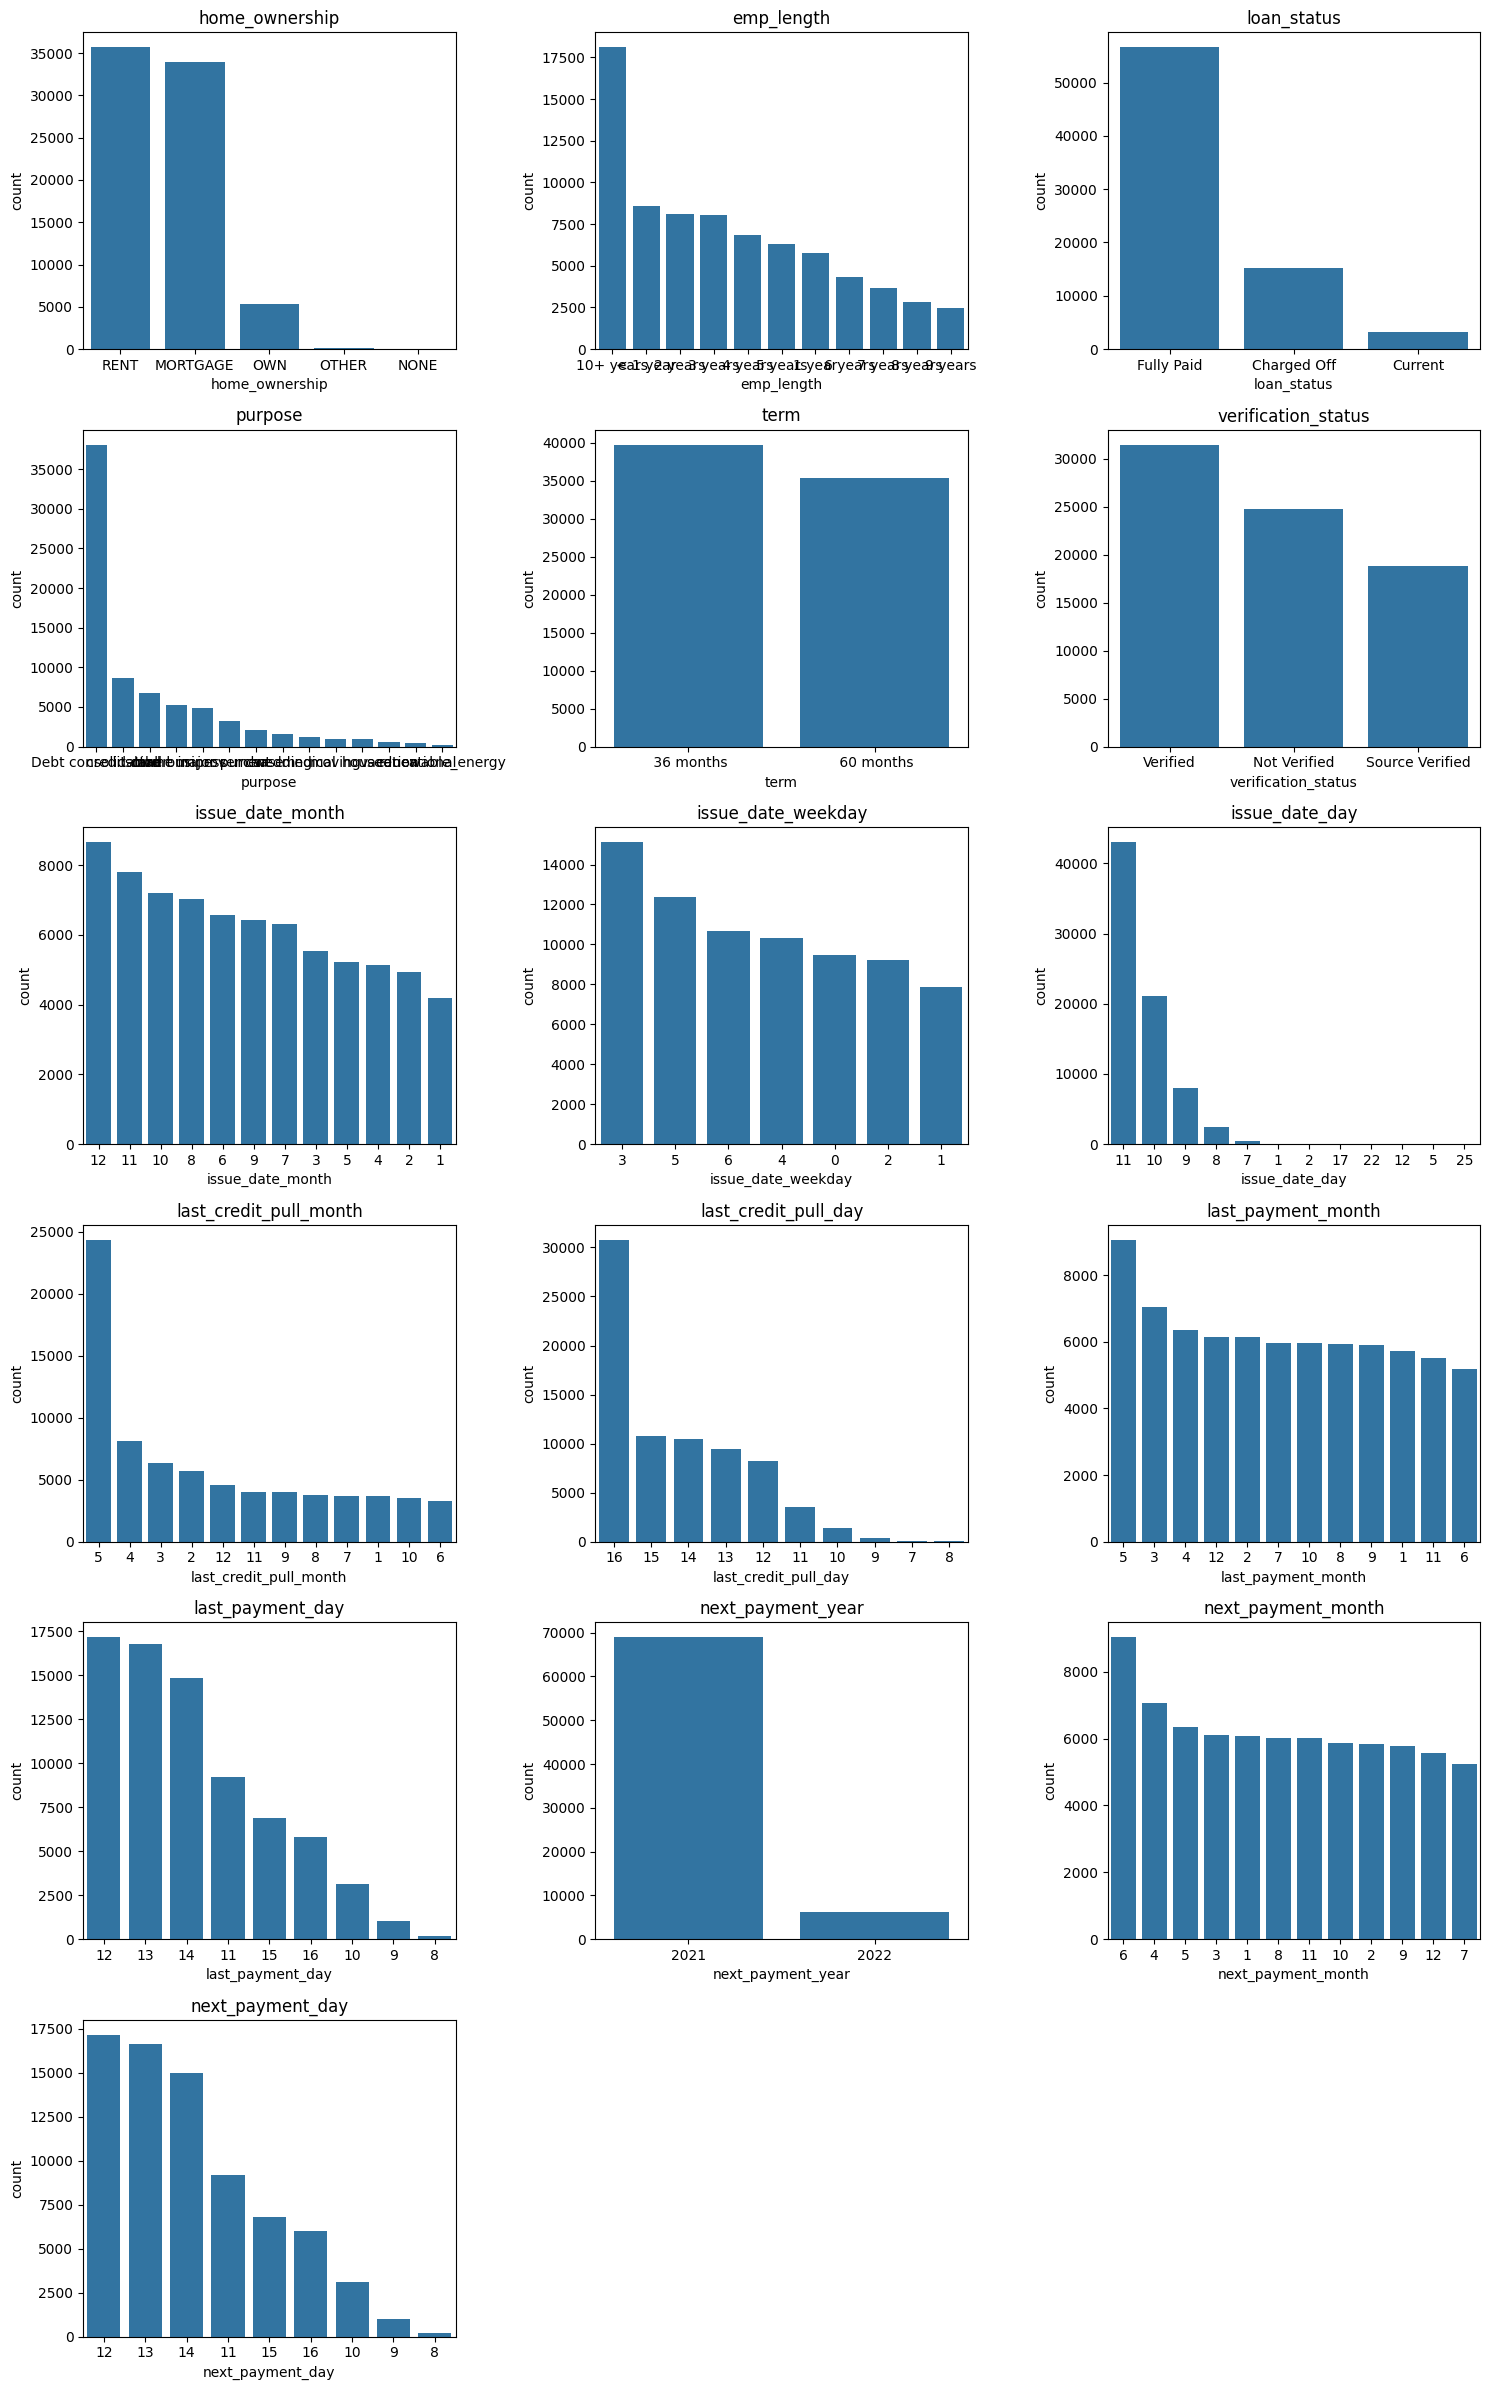

In [30]:
count_plot(cat_cols)

<Axes: xlabel='purpose', ylabel='count'>

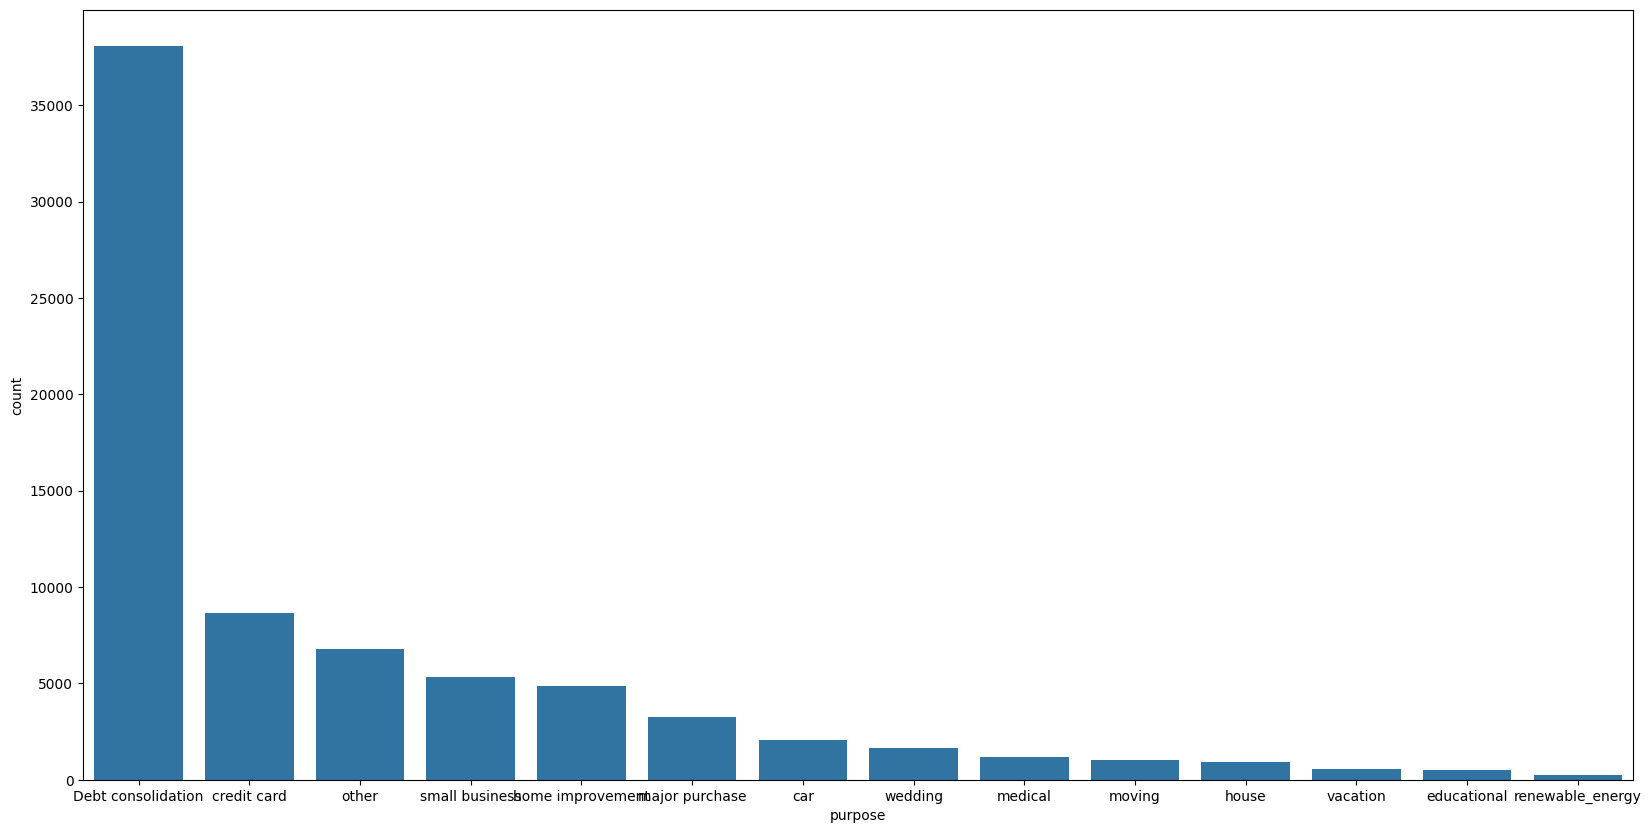

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x=new_df['purpose'],order=new_df['purpose'].value_counts().index)

### Rough Estimation of Correlations before imputation of null values

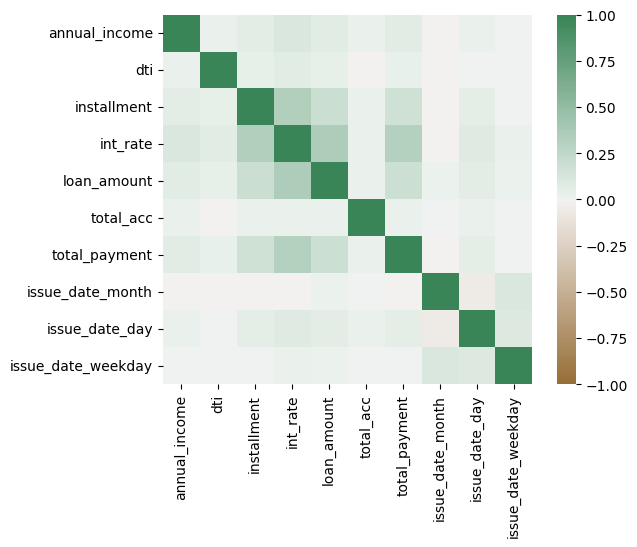

In [32]:
correlation_full = df_numeric.corr()

axis_corr = sns.heatmap(
correlation_full,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

## Univariate Analysis

<Axes: xlabel='grade', ylabel='count'>

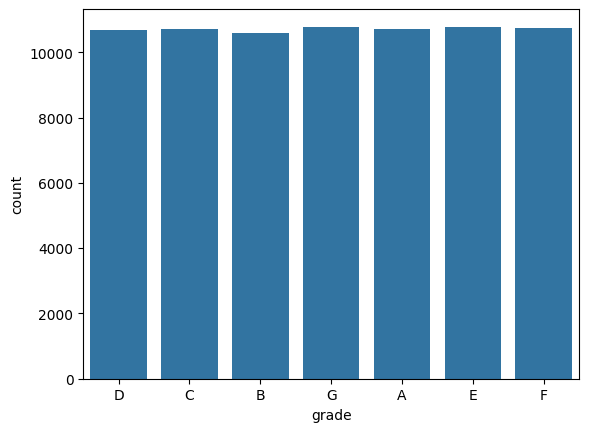

In [33]:
sns.countplot(x = target)
#conc: Data is balanced.

In [34]:
df_numeric.columns

Index(['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
       'total_acc', 'total_payment', 'issue_date_month', 'issue_date_day',
       'issue_date_weekday'],
      dtype='object')

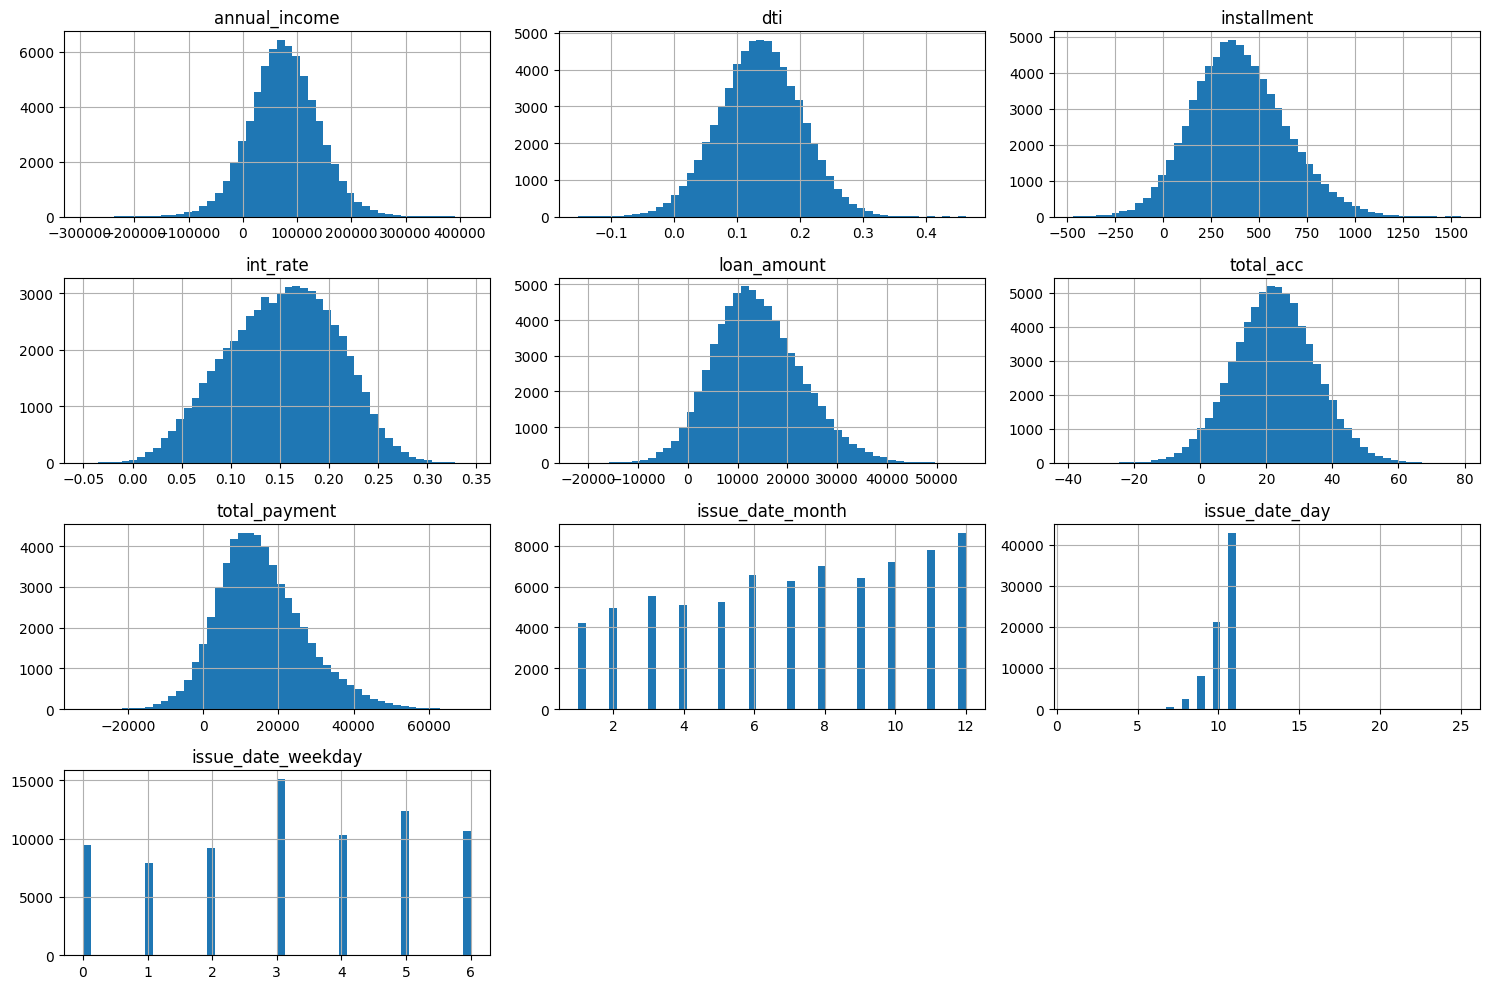

In [35]:
df_numeric.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [36]:
new_df['issue_date_weekday'].value_counts()

issue_date_weekday
3    15108
5    12353
6    10663
4    10311
0     9478
2     9203
1     7885
Name: count, dtype: int64

<Axes: xlabel='issue_date_month', ylabel='count'>

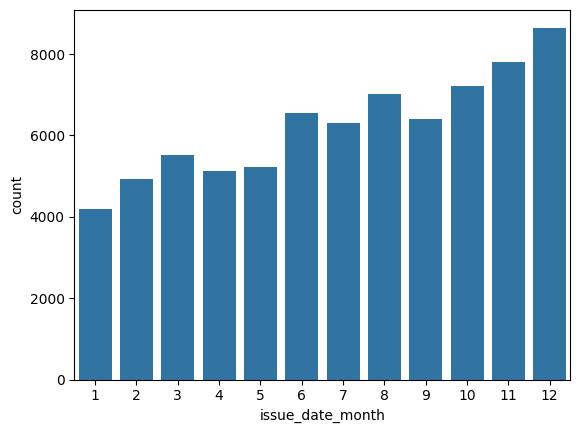

In [37]:
sns.countplot(x=df_numeric['issue_date_month'])

### Outlier Detection and removal

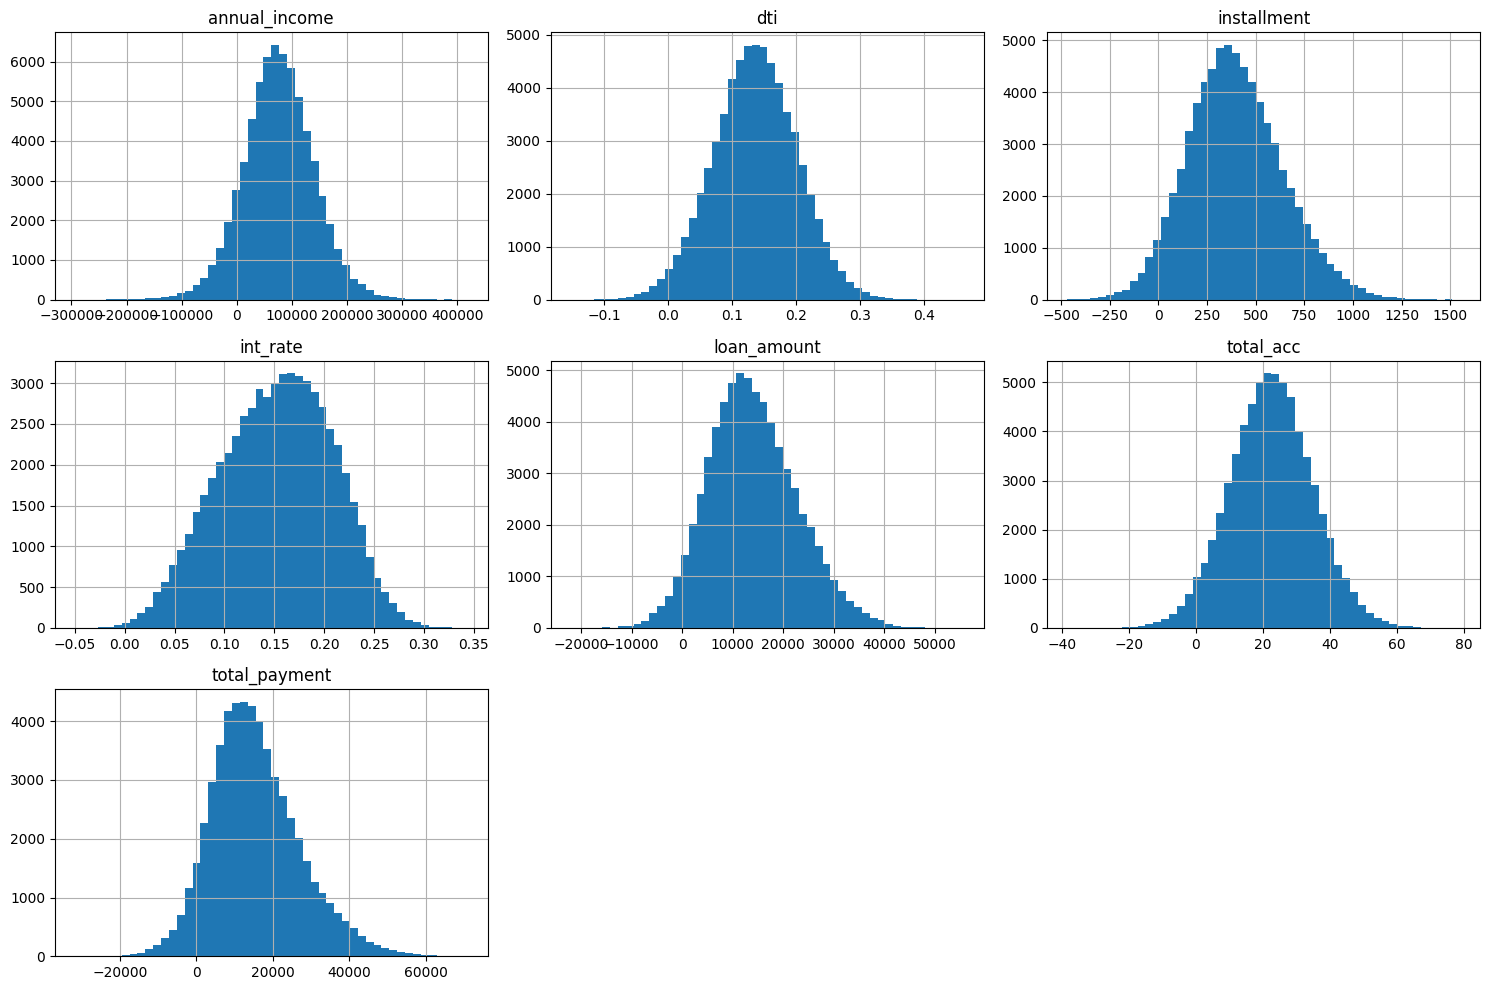

In [38]:
new_df[['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
       'total_acc', 'total_payment']].hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Negative loan amount 

In [39]:
new_df['loan_amount'][new_df['loan_amount'] < 0].index

Index([   10,    22,    55,    65,   122,   211,   228,   235,   243,   255,
       ...
       74703, 74766, 74799, 74801, 74823, 74892, 74896, 74902, 74959, 74969],
      dtype='int64', length=2844)

<Axes: xlabel='loan_status', ylabel='loan_amount'>

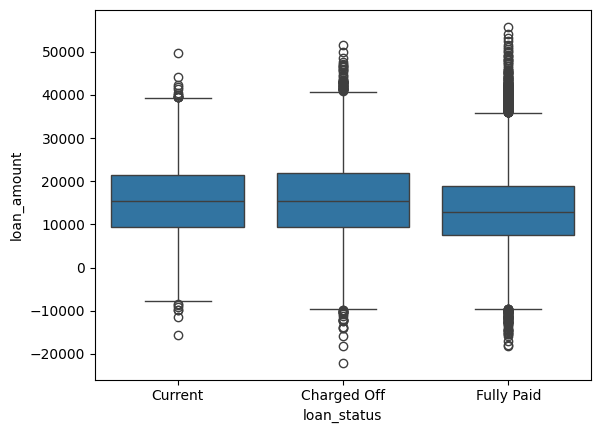

In [40]:
sns.boxplot(x=new_df['loan_status'],y=new_df['loan_amount'])

/tmp/ipykernel_2020/3597037101.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=new_df['loan_amount'])


<Axes: ylabel='Density'>

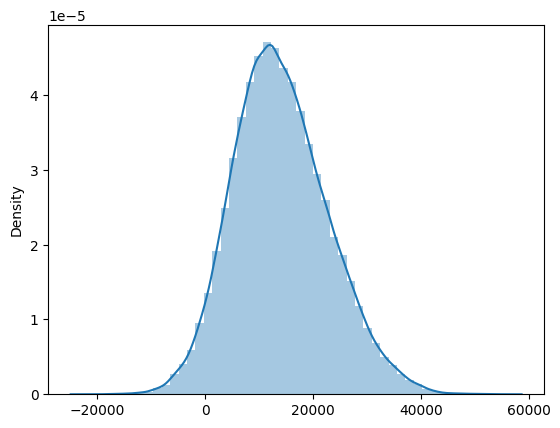

In [41]:
sns.distplot(x=new_df['loan_amount'])

In [42]:
# sns.barplot(x=new_df['grade'],y=df_numeric['int_rate'],hue=new_df[''])

<Axes: xlabel='issue_date_month', ylabel='int_rate'>

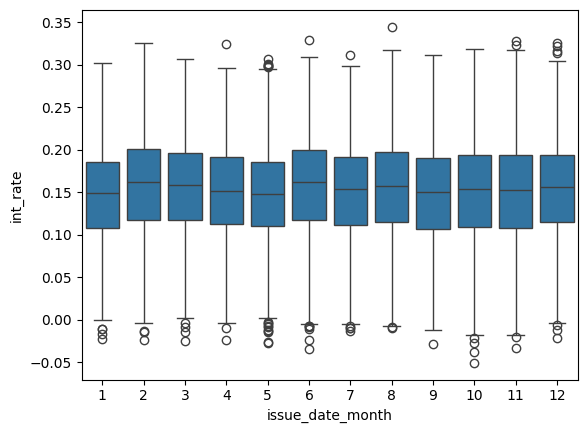

In [43]:
sns.boxplot(x=df_numeric['issue_date_month'],y=df_numeric['int_rate'])

In [44]:
# We will create new column as well with 

train_neg_count = (new_df['loan_amount'] < 0).sum()
test_neg_count = (df_test['loan_amount'] < 0).sum()

print(f"Training set - Negative loans: {train_neg_count} ({train_neg_count/len(new_df)*100:.2f}%)")
print(f"Test set - Negative loans: {test_neg_count} ({test_neg_count/len(df_test)*100:.2f}%)")

new_df['is_negative_loan'] = (new_df['loan_amount'] < 0).astype(int)
df_test['is_negative_loan'] = (df_test['loan_amount'] < 0).astype(int)

# Convert loan_amount to absolute value
new_df['loan_amount'] = new_df['loan_amount'].abs()
df_test['loan_amount'] = df_test['loan_amount'].abs()

# Verify the fix
print(f"\nAfter fix:")
print(f"Training set - Min loan amount: {new_df['loan_amount'].min()}")
print(f"Test set - Min loan amount: {df_test['loan_amount'].min()}")
print(f"New feature 'is_negative_loan' created with distribution:")
print(new_df['is_negative_loan'].value_counts())

Training set - Negative loans: 2844 (3.79%)
Test set - Negative loans: 1105 (4.42%)

After fix:
Training set - Min loan amount: 0.1920381863310467
Test set - Min loan amount: 0.2864662353294989
New feature 'is_negative_loan' created with distribution:
is_negative_loan
0    72157
1     2844
Name: count, dtype: int64


<Axes: xlabel='address_state', ylabel='count'>

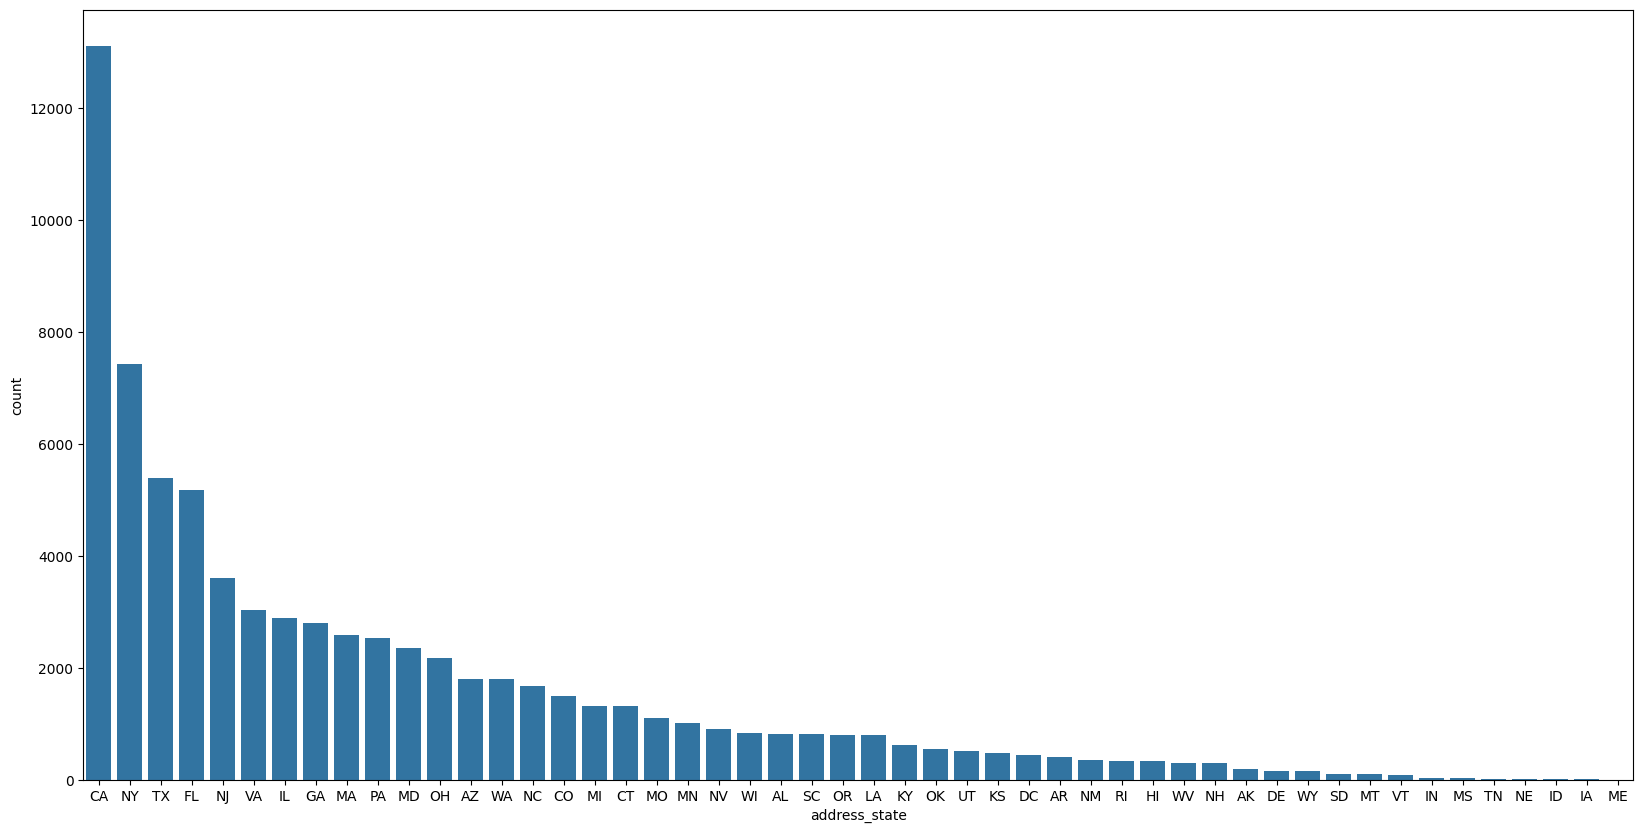

In [45]:
plt.figure(figsize=(20,10))
sns.countplot(x=new_df['address_state'],order=new_df['address_state'].value_counts().index)

## Feature Engineering

### Train test split

In [46]:
X = new_df.drop(columns=['grade'],axis=1)
y = new_df['grade']

In [47]:
X.columns

Index(['address_state', 'emp_length', 'emp_title', 'home_ownership',
       'loan_status', 'purpose', 'term', 'verification_status',
       'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
       'total_acc', 'total_payment', 'issue_date_month', 'issue_date_day',
       'issue_date_weekday', 'last_credit_pull_month', 'last_credit_pull_day',
       'last_payment_month', 'last_payment_day', 'next_payment_year',
       'next_payment_month', 'next_payment_day', 'is_negative_loan'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
X_test.shape,X.shape

((15001, 26), (75001, 26))

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 58913 to 15795
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   address_state           60000 non-null  object 
 1   emp_length              60000 non-null  object 
 2   emp_title               60000 non-null  object 
 3   home_ownership          60000 non-null  object 
 4   loan_status             60000 non-null  object 
 5   purpose                 60000 non-null  object 
 6   term                    60000 non-null  object 
 7   verification_status     60000 non-null  object 
 8   annual_income           54003 non-null  float64
 9   dti                     51005 non-null  float64
 10  installment             57004 non-null  float64
 11  int_rate                48005 non-null  float64
 12  loan_amount             54015 non-null  float64
 13  total_acc               54008 non-null  float64
 14  total_payment           45088 non-null 

In [51]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, LabelEncoder

### handling outliers

In [52]:
gaussian_cols = ['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
       'total_acc', 'total_payment']

In [53]:
for col in gaussian_cols:
    print(f"Highest allowed for {col}:",X_train[col].mean() + 3*X_train[col].std())
    print(f"Lowest allowed for {col}:",X_train[col].mean() - 3*X_train[col].std())

Highest allowed for annual_income: 266269.4193706907
Lowest allowed for annual_income: -114456.1001308349
Highest allowed for dti: 0.33086695828207346
Lowest allowed for dti: -0.058193206564651795
Highest allowed for installment: 1126.998566026061
Lowest allowed for installment: -331.8453471084915
Highest allowed for int_rate: 0.32012129347420337
Lowest allowed for int_rate: -0.015748285277584262
Highest allowed for loan_amount: 39321.7354927446
Lowest allowed for loan_amount: -10764.005951373574
Highest allowed for total_acc: 59.42913749243453
Lowest allowed for total_acc: -14.43267867934103
Highest allowed for total_payment: 50326.747298490394
Lowest allowed for total_payment: -19322.622448006943


In [54]:
# for train split
for col in gaussian_cols:
    '''Calculate the upper and lower limit from X_train and transform X_train'''
    upper_limit = X_train[col].mean() + 3*X_train[col].std()
    lower_limit = X_train[col].mean() - 3*X_train[col].std()
    X_train[col] = np.where(
                    X_train[col]>upper_limit,
                    upper_limit,
                    np.where(X_train[col] < lower_limit,lower_limit,X_train[col])
                    )

In [55]:
upper_limit

np.float64(50326.747298490394)

In [56]:
# for test split
for col in gaussian_cols:
    '''calculate the upper and lower limit from X_train and apply to X_test'''
    upper_limit = X_train[col].mean() + 3*X_train[col].std()
    lower_limit = X_train[col].mean() - 3*X_train[col].std()
    X_test[col] = np.where(
                    X_test[col]>upper_limit,
                    upper_limit,
                    np.where(X_test[col] < lower_limit,lower_limit,X_test[col])
                    )

In [57]:
# for test dataset
for col in gaussian_cols:
    '''calculate the upper and lower limit from X_train and apply to X_test'''
    upper_limit = X_train[col].mean() + 3*X_train[col].std()
    lower_limit = X_train[col].mean() - 3*X_train[col].std()
    df_test[col] = np.where(
                    df_test[col]>upper_limit,
                    upper_limit,
                    np.where(df_test[col] < lower_limit,lower_limit,df_test[col])
                    )

### Managing address_state

In [58]:
# Frequency encoding for address_state
address_freq = X_train['address_state'].value_counts(normalize=True).to_dict()
X_train['address_state_freq'] = X_train['address_state'].map(address_freq)
X_test['address_state_freq'] = X_test['address_state'].map(address_freq).fillna(0)


### Managing purpose

In [59]:
# Frequency encoding for purpose (also high cardinality)
purpose_freq = X_train['purpose'].value_counts(normalize=True).to_dict()
X_train['purpose_freq'] = X_train['purpose'].map(purpose_freq)
X_test['purpose_freq'] = X_test['purpose'].map(purpose_freq).fillna(0)

In [60]:
# for test dataset

df_test['address_state_freq'] = df_test['address_state'].map(address_freq).fillna(0)
df_test['purpose_freq'] = df_test['purpose'].map(address_freq).fillna(0)

### Managing term

In [61]:
new_df['term'].value_counts()

term
36 months    39688
60 months    35313
Name: count, dtype: int64

In [62]:
X_train['term'] = X_train['term'].str.extract('(\d+)').astype(int)
X_test['term'] = X_test['term'].str.extract('(\d+)').astype(int)

#for test dataset
df_test['term'] = df_test['term'].str.extract('(\d+)').astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_2020/3079293379.py:1: SyntaxWarning: invalid escape sequence '\d'
  X_train['term'] = X_train['term'].str.extract('(\d+)').astype(int)
/tmp/ipykernel_2020/3079293379.py:2: SyntaxWarning: invalid escape sequence '\d'
  X_test['term'] = X_test['term'].str.extract('(\d+)').astype(int)
/tmp/ipykernel_2020/3079293379.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_test['term'] = df_test['term'].str.extract('(\d+)').astype(int)


### Managing emp_length

In [63]:
X_train['emp_length'].unique()

array(['< 1 year', '10+ years', '5 years', '1 year', '6 years', '3 years',
       '7 years', '9 years', '2 years', '4 years', '8 years'],
      dtype=object)

In [64]:
oe = OrdinalEncoder(categories=[['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '10+ years']])
X_train['emp_length_encoded'] = oe.fit_transform(X_train[['emp_length']])
X_test['emp_length_encoded'] = oe.transform(X_test[['emp_length']])

In [65]:
#for test dataset
df_test['emp_length_encoded'] = oe.transform(df_test[['emp_length']])

In [66]:
X_train.columns

Index(['address_state', 'emp_length', 'emp_title', 'home_ownership',
       'loan_status', 'purpose', 'term', 'verification_status',
       'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
       'total_acc', 'total_payment', 'issue_date_month', 'issue_date_day',
       'issue_date_weekday', 'last_credit_pull_month', 'last_credit_pull_day',
       'last_payment_month', 'last_payment_day', 'next_payment_year',
       'next_payment_month', 'next_payment_day', 'is_negative_loan',
       'address_state_freq', 'purpose_freq', 'emp_length_encoded'],
      dtype='object')

In [67]:
X_train = X_train.drop(columns=['emp_length','emp_title','address_state','purpose'])
X_test = X_test.drop(columns=['emp_length','emp_title','address_state','purpose'])

df_test = df_test.drop(columns=['emp_length','emp_title','address_state','purpose'])

In [68]:
X_train[:5]

,home_ownership,loan_status,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,...,last_credit_pull_day,last_payment_month,last_payment_day,next_payment_year,next_payment_month,next_payment_day,is_negative_loan,address_state_freq,purpose_freq,emp_length_encoded
58913,RENT,Charged Off,60,Not Verified,33134.380668,0.250561,1126.998566,NaN,NaN,27.043239,...,16,8,11,2021,8,12,0,0.024067,0.507950,0.0
1200,RENT,Fully Paid,60,Not Verified,230420.512697,0.155936,401.421940,0.120267,13179.835304,28.203326,...,16,7,14,2021,4,13,0,0.174967,0.065333,10.0
26800,OWN,Fully Paid,36,Source Verified,51687.389092,0.084771,597.839276,0.118160,15151.290192,21.234895,...,14,10,11,2021,11,11,0,0.024067,0.507950,10.0
11518,RENT,Fully Paid,60,Source Verified,20390.656637,0.156953,124.940829,NaN,19361.589360,31.875037,...,15,5,16,2021,8,14,0,0.019717,0.065333,5.0
22941,RENT,Fully Paid,36,Verified,82319.815092,0.220539,470.067580,0.106208,21284.108772,21.529276,...,16,10,12,2021,8,13,0,0.071483,0.006650,5.0


### OHE required columns :  home_ownership, loan_status, verification_status

In [69]:
X_train.columns

Index(['home_ownership', 'loan_status', 'term', 'verification_status',
       'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
       'total_acc', 'total_payment', 'issue_date_month', 'issue_date_day',
       'issue_date_weekday', 'last_credit_pull_month', 'last_credit_pull_day',
       'last_payment_month', 'last_payment_day', 'next_payment_year',
       'next_payment_month', 'next_payment_day', 'is_negative_loan',
       'address_state_freq', 'purpose_freq', 'emp_length_encoded'],
      dtype='object')

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2

# Categorical columns for one-hot encoding
cols_for_ohe = [
    'home_ownership', 'loan_status','verification_status'
]

# Numerical columns that need imputation AND scaling
cols_for_impute_and_scale= [
    'annual_income', 'dti', 'installment',
    'int_rate', 'loan_amount', 'total_acc', 'total_payment'
]


rem_cols = ['term','issue_date_month', 'issue_date_day',
       'issue_date_weekday', 'last_credit_pull_month', 'last_credit_pull_day',
       'last_payment_month', 'last_payment_day', 'next_payment_year',
       'next_payment_month', 'next_payment_day', 'is_negative_loan',
       'address_state_freq', 'purpose_freq', 'emp_length_encoded'
    ]
# Pipeline 1: One-hot encoding for categorical
# pipe1 = Pipeline([
#     ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
# ])

# # Pipeline 2: Impute THEN scale for numerical columns with missing values
# pipe2 = Pipeline([
#     ('impute', SimpleImputer(strategy='median')),
#     ('scale', StandardScaler())
# ])

# # Pipeline 3: Only scale for numerical columns without missing values
# pipe3 = Pipeline([
#     ('scale', StandardScaler())
# ])

# preprocessor = ColumnTransformer([
#     ('ohe', pipe1, cols_for_ohe),
#     ('imp_scale', pipe2, cols_for_impute_and_scale),
#     ('scale', pipe3, cols_for_scale_only)
# ], remainder='passthrough')


# X_train_final = preprocessor.fit_transform(X_train)
# X_test_final = preprocessor.transform(X_test)


In [71]:
oe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_enc = oe.fit_transform(X_train[cols_for_ohe])
X_test_enc = oe.transform(X_test[cols_for_ohe])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [72]:
X_train_enc.shape

(60000, 7)

In [73]:
se = SimpleImputer(strategy='median')
X_train_imputed = se.fit_transform(X_train[cols_for_impute_and_scale])
X_test_imputed = se.transform(X_test[cols_for_impute_and_scale])

In [74]:
X_train_imputed[0]

array([3.31343807e+04, 2.50560852e-01, 1.12699857e+03, 1.54890267e-01,
       1.33977843e+04, 2.70432391e+01, 1.27081568e+04])

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [76]:
X_train_scaled[0]

array([-0.7165417 ,  1.91483678,  3.09449392,  0.04317688, -0.09923346,
        0.39033894, -0.24610139])

In [77]:
X_train_enc[0]

array([0., 0., 1., 0., 0., 0., 0.])

In [78]:
X_train[rem_cols]

,term,issue_date_month,issue_date_day,issue_date_weekday,last_credit_pull_month,last_credit_pull_day,last_payment_month,last_payment_day,next_payment_year,next_payment_month,next_payment_day,is_negative_loan,address_state_freq,purpose_freq,emp_length_encoded
58913,60,6,11,4,5,16,8,11,2021,8,12,0,0.024067,0.507950,0.0
1200,60,1,11,0,5,16,7,14,2021,4,13,0,0.174967,0.065333,10.0
26800,36,5,8,5,9,14,10,11,2021,11,11,0,0.024067,0.507950,10.0
11518,60,12,11,5,1,15,5,16,2021,8,14,0,0.019717,0.065333,5.0
22941,36,9,10,4,5,16,10,12,2021,8,13,0,0.071483,0.006650,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,36,7,11,6,8,15,2,13,2021,9,11,0,0.022350,0.115200,9.0
6265,60,4,10,5,3,12,2,14,2021,10,14,0,0.034667,0.070083,4.0
54886,36,10,11,0,2,12,3,14,2021,5,11,0,0.037250,0.070083,3.0
860,60,3,10,2,11,14,10,10,2022,1,12,0,0.028617,0.044133,1.0


In [79]:
X_train_rem = scaler.fit_transform(X_train[rem_cols])
X_test_rem = scaler.transform(X_test[rem_cols])

In [80]:
X_train_final = np.hstack([
    X_train_enc,           
    X_train_scaled,      
    X_train_rem            
])

X_test_final = np.hstack([
    X_test_enc,
    X_test_scaled,
    X_test_rem
])

In [81]:
X_train_final[0]

array([ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.7165417 ,  1.91483678,  3.09449392,
        0.04317688, -0.09923346,  0.39033894, -0.24610139,  1.0602095 ,
       -0.33859177,  0.71653503,  0.42143648, -0.25930724,  0.92161081,
        0.47931741, -1.19579489, -0.29811061,  0.47848288, -0.58610381,
       -0.19838595, -0.72643987,  0.97810298, -1.42956135])

In [82]:
X_train.isna().sum()

home_ownership                0
loan_status                   0
term                          0
verification_status           0
annual_income              5997
dti                        8995
installment                2996
int_rate                  11995
loan_amount                5985
total_acc                  5992
total_payment             14912
issue_date_month              0
issue_date_day                0
issue_date_weekday            0
last_credit_pull_month        0
last_credit_pull_day          0
last_payment_month            0
last_payment_day              0
next_payment_year             0
next_payment_month            0
next_payment_day              0
is_negative_loan              0
address_state_freq            0
purpose_freq                  0
emp_length_encoded            0
dtype: int64

In [84]:
X_train[:5], X_train_final[:5]

(      home_ownership  loan_status  term verification_status  annual_income  \
 58913           RENT  Charged Off    60        Not Verified   33134.380668   
 1200            RENT   Fully Paid    60        Not Verified  230420.512697   
 26800            OWN   Fully Paid    36     Source Verified   51687.389092   
 11518           RENT   Fully Paid    60     Source Verified   20390.656637   
 22941           RENT   Fully Paid    36            Verified   82319.815092   
 
             dti  installment  int_rate   loan_amount  total_acc  ...  \
 58913  0.250561  1126.998566       NaN           NaN  27.043239  ...   
 1200   0.155936   401.421940  0.120267  13179.835304  28.203326  ...   
 26800  0.084771   597.839276  0.118160  15151.290192  21.234895  ...   
 11518  0.156953   124.940829       NaN  19361.589360  31.875037  ...   
 22941  0.220539   470.067580  0.106208  21284.108772  21.529276  ...   
 
        last_credit_pull_day  last_payment_month  last_payment_day  \
 58913        

In [85]:
# for test dataset
# df_test_final = preprocessor.transform(df_test)

In [86]:
X_train_final[0]

array([ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.7165417 ,  1.91483678,  3.09449392,
        0.04317688, -0.09923346,  0.39033894, -0.24610139,  1.0602095 ,
       -0.33859177,  0.71653503,  0.42143648, -0.25930724,  0.92161081,
        0.47931741, -1.19579489, -0.29811061,  0.47848288, -0.58610381,
       -0.19838595, -0.72643987,  0.97810298, -1.42956135])

In [87]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [88]:
y_train

,grade
58913,F
1200,E
26800,B
11518,E
22941,B
...,...
37194,D
6265,D
54886,G
860,G


In [89]:
Oe_label = OrdinalEncoder(categories=[['G','F','E','D','C','B','A']])
y_train = Oe_label.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_test= Oe_label.transform(y_test.values.reshape(-1,1)).ravel()

In [90]:
X_train_final.shape

(60000, 29)

In [91]:
y_train

array([1., 2., 5., ..., 0., 0., 2.])

In [97]:
from sklearn import linear_model
logr = linear_model.LogisticRegression(max_iter=1000,solver='saga',random_state=42)
logr.fit(X_train_final,y_train)
preds = logr.predict(X_test_final)

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.52      0.59      0.55      2179
         1.0       0.39      0.30      0.34      2151
         2.0       0.33      0.37      0.35      2147
         3.0       0.33      0.35      0.34      2090
         4.0       0.31      0.29      0.30      2105
         5.0       0.41      0.33      0.37      2084
         6.0       0.63      0.73      0.68      2245

    accuracy                           0.43     15001
   macro avg       0.42      0.42      0.42     15001
weighted avg       0.42      0.43      0.42     15001



In [76]:
X_train_final[0]

array([ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.71751102,  1.91537604,  3.09483069,
        0.        ,  0.        ,  0.39046297, -0.27750768,  1.0602095 ,
       -0.29811061,  6.        , 11.        ,  4.        ,  5.        ,
       16.        ,  8.        , 11.        ,  8.        , 12.        ,
        0.        ,  0.02406667,  0.50795   ,  0.        ])

In [92]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train_final,y_train)
preds_xg = xg.predict(X_test_final)

In [93]:
X_train_final[0].shape

(29,)

In [127]:
# from sklearn.model_selection import cross_validate

# model = linear_model.LogisticRegression(max_iter=1000, random_state=42)

# # scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# cv_results = cross_validate(
#     model,
#     X_train_final,
#     y_train,
#     cv=5,
#     scoring='accuracy',
#     return_train_score=True 
# )

# print(f"Test Accuracy: {cv_results['test_accuracy'].mean():.4f}")
# print(f"Test Precision: {cv_results['test_precision_macro'].mean():.4f}")
# print(f"Test Recall: {cv_results['test_recall_macro'].mean():.4f}")
# print(f"Test F1: {cv_results['test_f1_macro'].mean():.4f}")

In [75]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# # Better XGBoost configuration
# xg = XGBClassifier(
#     n_estimators=200,
#     max_depth=6,
#     learning_rate=0.1,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42,
#     n_jobs=-1
# )

# # Quick hyperparameter search
# param_grid = {
#     'max_depth': [4, 6, 8],
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.05, 0.1, 0.2]
# }

# grid_search = GridSearchCV(
#     xg, param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1
# )
# grid_search.fit(X_train_final, y_train)

# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best F1 score: {grid_search.best_score_:.4f}")

# # Use best model
# best_xg = grid_search.best_estimator_
# preds_xg = best_xg.predict(X_test_final)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
Best F1 score: 0.4847


In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds_xg))

              precision    recall  f1-score   support

         0.0       0.60      0.66      0.63      2179
         1.0       0.45      0.44      0.44      2151
         2.0       0.37      0.35      0.36      2147
         3.0       0.39      0.40      0.39      2090
         4.0       0.46      0.38      0.42      2105
         5.0       0.43      0.42      0.42      2084
         6.0       0.70      0.79      0.74      2245

    accuracy                           0.49     15001
   macro avg       0.48      0.49      0.49     15001
weighted avg       0.49      0.49      0.49     15001



In [95]:
from sklearn.multiclass import OneVsOneClassifier

# One-vs-One creates more decision boundaries between similar classes
ovo_xgb = OneVsOneClassifier(
    XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.2, random_state=42)
)

ovo_xgb.fit(X_train_final, y_train)
preds_ovo = ovo_xgb.predict(X_test_final)

print(classification_report(y_test, preds_ovo))

              precision    recall  f1-score   support

         0.0       0.61      0.66      0.63      2179
         1.0       0.47      0.42      0.44      2151
         2.0       0.37      0.34      0.35      2147
         3.0       0.38      0.42      0.40      2090
         4.0       0.46      0.37      0.41      2105
         5.0       0.42      0.44      0.43      2084
         6.0       0.70      0.80      0.75      2245

    accuracy                           0.50     15001
   macro avg       0.49      0.49      0.49     15001
weighted avg       0.49      0.50      0.49     15001



In [96]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    num_leaves=31,
    class_weight='balanced',  # Built-in class balancing
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

lgb.fit(X_train_final, y_train)
preds_lgb = lgb.predict(X_test_final)

print(classification_report(y_test, preds_lgb))

/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.60      0.67      0.63      2179
         1.0       0.45      0.44      0.44      2151
         2.0       0.37      0.34      0.35      2147
         3.0       0.40      0.41      0.40      2090
         4.0       0.45      0.36      0.40      2105
         5.0       0.42      0.43      0.42      2084
         6.0       0.70      0.79      0.74      2245

    accuracy                           0.49     15001
   macro avg       0.48      0.49      0.49     15001
weighted avg       0.49      0.49      0.49     15001



In [76]:
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

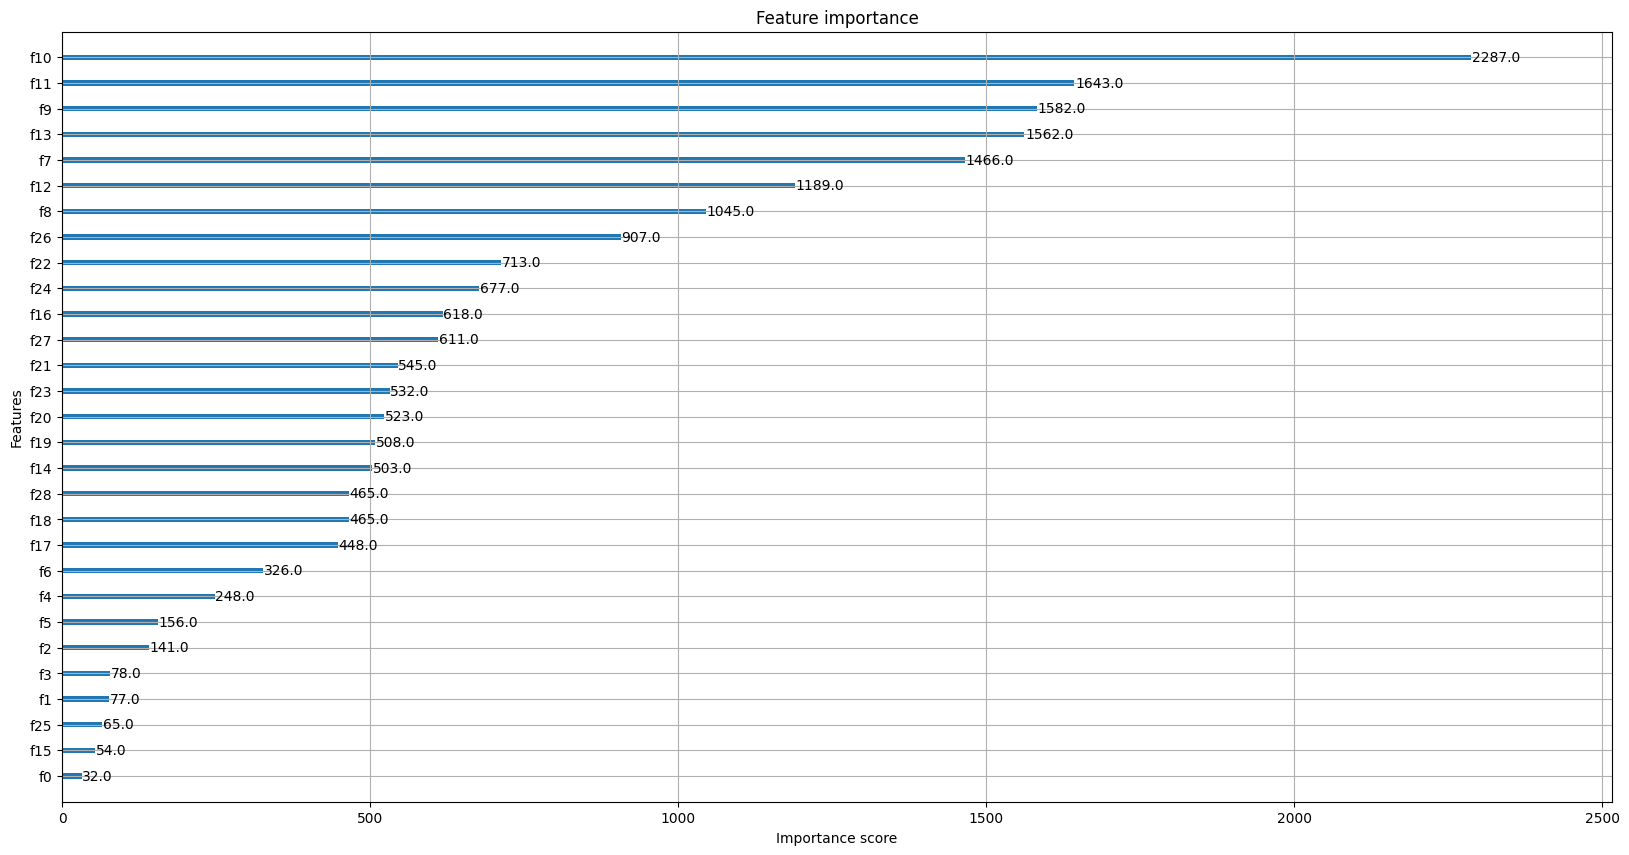

In [77]:
plot_features(best_xg,(20,10))

In [131]:
df_test

,address_state,application_type,emp_length,emp_title,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,int_rate,loan_amount,total_acc,total_payment,issue_date_year,issue_date_month,issue_date_day,issue_date_weekday,issue_date_hour,is_negative_loan
0,AZ,INDIVIDUAL,9 years,aramark,RENT,2021-12-11,2021-07-12,2021-04-14,Fully Paid,2021-04-14,...,0.165183,4712.452587,33.811053,15618.183863,2021,12,11,5,0,0
1,AR,INDIVIDUAL,4 years,BICE UNIVERSAL,MORTGAGE,2021-03-11,2021-04-12,2021-01-13,Fully Paid,2021-11-15,...,0.195068,9903.064207,21.311279,7407.930173,2021,3,11,3,0,0
2,MN,INDIVIDUAL,< 1 year,GE,MORTGAGE,2021-09-09,2021-04-16,2021-10-11,Fully Paid,2021-02-15,...,0.117257,20489.578256,23.611394,11679.837283,2021,9,9,3,0,0
3,VA,INDIVIDUAL,10+ years,Vandroff Insurance Agency Inc,MORTGAGE,2021-01-11,2021-05-10,2021-12-14,Charged Off,2021-03-13,...,0.111633,6963.410907,21.321120,16809.851191,2021,1,11,0,0,0
4,PA,INDIVIDUAL,4 years,DuPont,RENT,2021-12-11,2021-11-14,2021-11-10,Fully Paid,2021-05-12,...,0.115362,17750.594324,-4.410057,19410.196765,2021,12,11,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24996,CA,INDIVIDUAL,6 years,JAP Consulting,MORTGAGE,2021-07-11,2021-12-12,2021-02-12,Charged Off,2021-10-13,...,0.192070,16676.551864,44.123216,436.494584,2021,7,11,6,0,0
24997,MN,INDIVIDUAL,1 year,BNSF Railway,RENT,2021-09-11,2021-06-15,2021-09-14,Charged Off,2021-09-11,...,0.128193,9286.433648,14.053814,8535.395675,2021,9,11,5,0,0
24998,CA,INDIVIDUAL,10+ years,Sourthern Garden,OWN,2021-09-10,2021-09-12,2021-02-13,Fully Paid,2021-09-15,...,0.280305,17320.915298,35.661458,27806.489075,2021,9,10,4,0,0
24999,CT,INDIVIDUAL,5 years,East Coast Honda - VW,OWN,2021-11-10,2021-04-16,2021-09-14,Fully Paid,2021-09-14,...,0.085519,10231.704225,14.905797,3106.685154,2021,11,10,2,0,0


In [81]:
#prediction on test dataset
predictions = ovo_xgb.predict(df_test_final)

In [82]:
predictions

array([3., 3., 5., ..., 0., 6., 6.])

In [94]:
ohe = OneHotEncoder(sparse_output=False, categories=[range(7)])
y_pred_onehot = ohe.fit_transform(predictions.reshape(-1,1))

# Create submission dataframe
grade_labels = ['grade_A','grade_B','grade_C','grade_D','grade_E','grade_F','grade_G']
submission = pd.DataFrame(
    y_pred_onehot,
    columns=grade_labels
)
submission.insert(0, 'member_id', test_ids)
submission.head()

,member_id,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,600267.095762,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,978907.385102,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,886604.431881,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,437681.459804,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,659097.430169,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
submission.to_csv('output.csv',index=False)